In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one
from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
# from small_script.myFunctions import *
sys.path.insert(0, "/Users/weilu/openmmawsem")
from helperFunctions.myFunctions import *
from collections import defaultdict
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = np.array([16.18033, 10])    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 22})

In [71]:
# pre = "/Users/weilu/Research/server_backup/feb_2019/jan_optimization/gammas/"
# pre = "/Users/weilu/Research/server/april_2019/optimization_test/gammas/"
pre = "/Users/weilu/Research/server/sep_2019/peptide_optimization/optimization/gammas/"
# pp = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0"
# pp = "proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
pp = f"protein_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"

A_name = pp + "_A"
B_name = pp + "_B"
B_filtered_name = pp + "_B_filtered"
P_name = pp + "_P"
Gamma_name = pp + "_gamma"
Gamma_filtered_name = pp + "_gamma_filtered"
Lamb_name = pp + "_lamb"
Lamb_filtered_name = pp + "_lamb_filtered"

A = np.loadtxt(pre+A_name)
B = np.loadtxt(pre+B_name)
B_filtered = np.loadtxt(pre+B_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Gamma = np.loadtxt(pre+Gamma_name)
Gamma_filtered = np.loadtxt(pre+Gamma_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Lamb = np.loadtxt(pre+Lamb_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Lamb_filtered = np.loadtxt(pre+Lamb_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})

half_B_name = pp + "_half_B"
half_B = np.loadtxt(pre+half_B_name)
other_half_B_name = pp + "_other_half_B"
other_half_B = np.loadtxt(pre+other_half_B_name)
std_half_B_name = pp + "_std_half_B"
std_half_B = np.loadtxt(pre+std_half_B_name)


# pre = "/Users/weilu/Research/server/april_2019/"
location = pre + "../../phis/protein_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0_phi_decoy_summary.txt"
A_prime = np.loadtxt(location)





In [63]:
pre = "/Users/weilu/Research/server/sep_2019/peptide_optimization/optimization/gammas/"
name_pre = f"protein_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
A_name = f"{name_pre}_A"
B_name = f"{name_pre}_B"
B_filtered_name = f"{name_pre}_B_filtered"
P_name = f"{name_pre}_P"
Gamma_name = f"{name_pre}_gamma"
Gamma_filtered_name = f"{name_pre}_gamma_filtered"
Lamb_name = f"{name_pre}_lamb"
Lamb_filtered_name = f"{name_pre}_lamb_filtered"

A = np.loadtxt(pre+A_name)
B = np.loadtxt(pre+B_name)
B_filtered = np.loadtxt(pre+B_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Gamma = np.loadtxt(pre+Gamma_name)
Gamma_filtered = np.loadtxt(pre+Gamma_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Lamb = np.loadtxt(pre+Lamb_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Lamb_filtered = np.loadtxt(pre+Lamb_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})



In [100]:
# maximum difference between loaded and computed is 1e-5.
max(lamb-Lamb)

(1.5022809272030481e-05+0j)

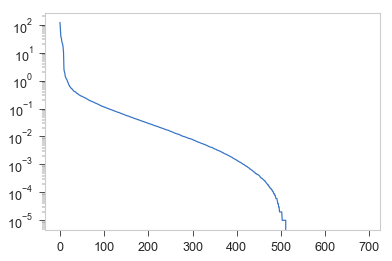

In [99]:
plt.plot(Lamb)
plt.yscale("log")

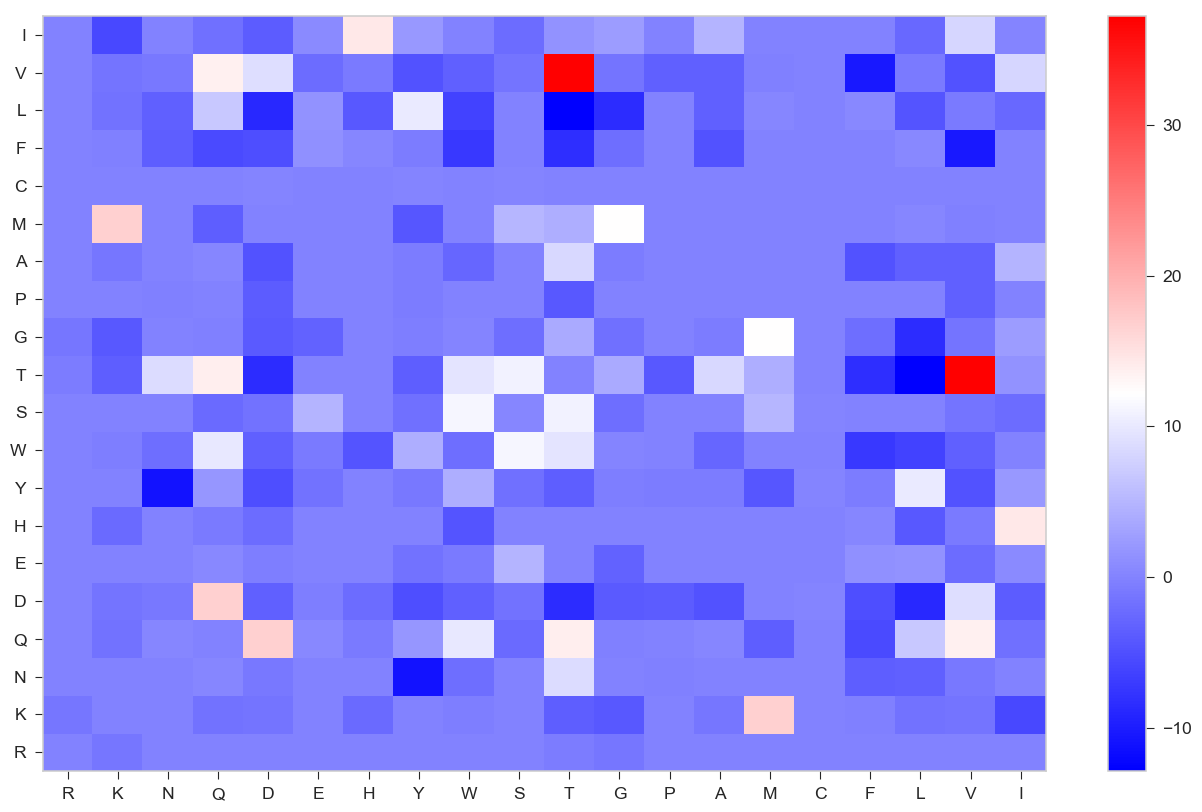

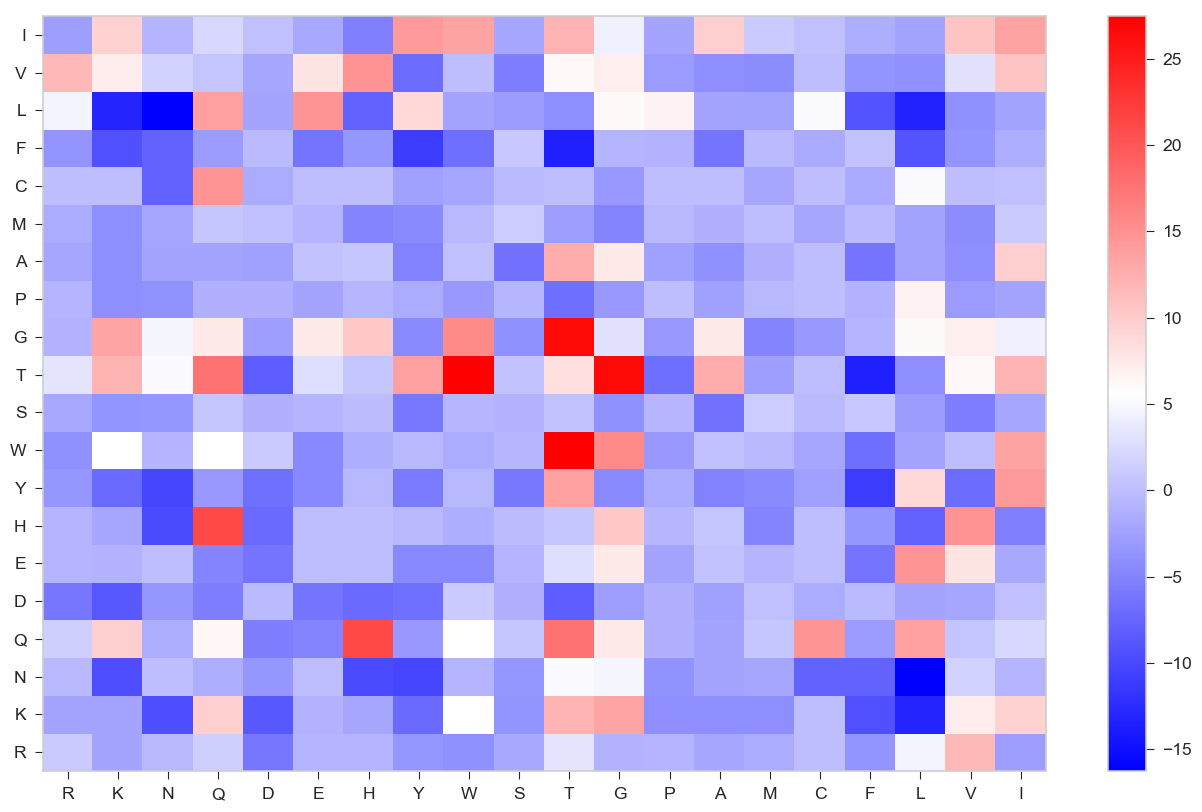

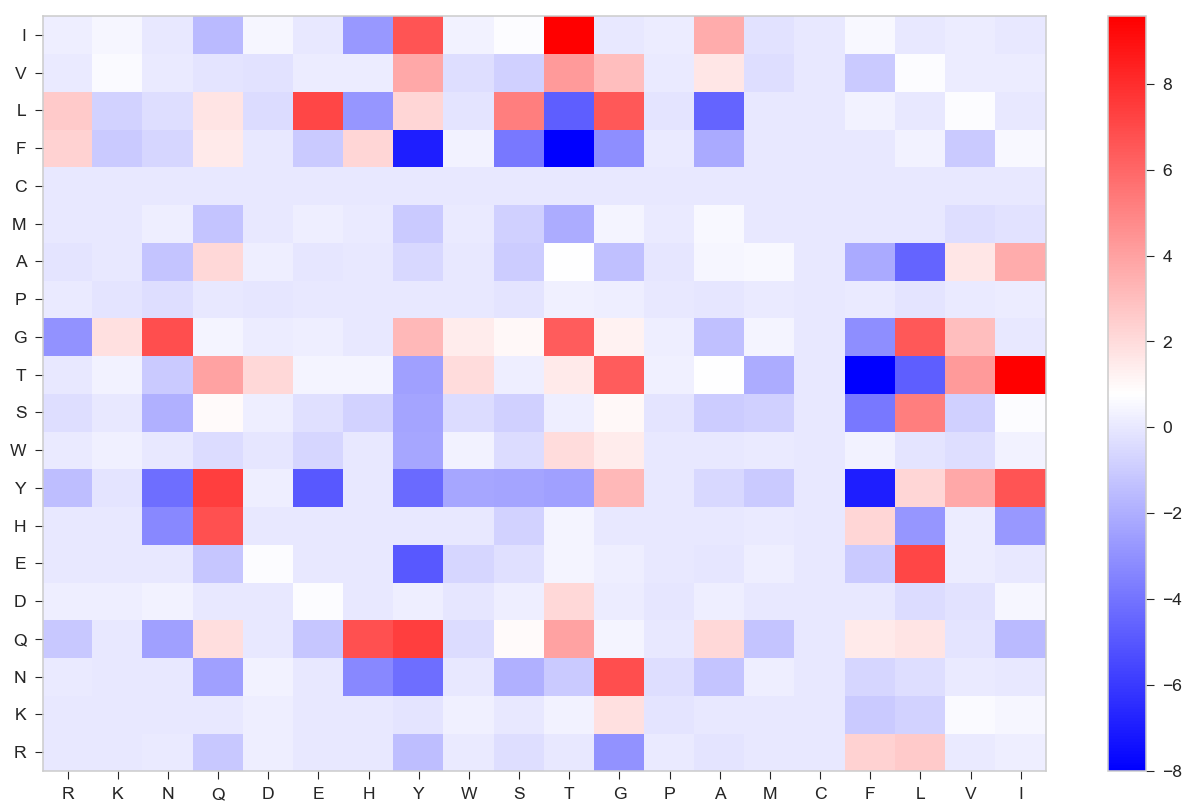

In [105]:
lamb, P = np.linalg.eig(B)
lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)
filtered_lamb = np.copy(lamb)
cutoff_mode = 100
filtered_B_inv, filtered_lamb, P = get_filtered_B_inv_lambda_and_P(filtered_lamb, 
                                                                   cutoff_mode, P)
filtered_gamma = np.dot(filtered_B_inv, A)
filtered_B = np.linalg.inv(filtered_B_inv)
plot_contact_well(filtered_gamma[:210], inferBound=True)
plot_contact_well(filtered_gamma[210:420], inferBound=True)
plot_contact_well(filtered_gamma[420:], inferBound=True)

In [106]:
save_gamma_pre = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/"
np.savetxt(f"{save_gamma_pre}/cutoff100", filtered_gamma)

In [107]:
os.chdir('/Users/weilu/opt/notebook/Optimization')

'/Users/weilu/opt/notebook/Optimization'

In [109]:
os.chdir("/Users/weilu/Research/server/sep_2019/peptide_optimization/optimization/")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/cutoff100"
data = validate_hamiltonian_wei("phi_list.txt", "protein_list_tiny", gamma_file_name, "shuffle", 1000, mode=0)
data


210
420
60
0 5.651048869882155
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
2

,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1,5.651049,-3008.457623,-1266.073497,308.329333
1,2,5.615784,-2742.978825,-1071.181503,297.696134
2,3,5.751925,-2625.236556,-903.822166,299.276227
3,4,5.757630,-2736.832105,-1026.833311,296.997018
4,5,5.541917,-2652.731026,-1061.958377,287.043734
5,6,5.640894,-2646.236207,-977.280624,295.867223
6,7,5.643035,-2595.491454,-877.928416,304.368652
7,8,5.632280,-2636.063746,-922.999355,304.151143
8,9,5.713291,-2651.458445,-931.172575,301.102450
9,10,5.940028,-2726.245430,-934.732806,301.600012


In [113]:
gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/converted_original_gamma.dat"
original = np.loadtxt(gamma_file_name)
gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/converted_original_gamma_2.dat"
original_2 = np.loadtxt(gamma_file_name)

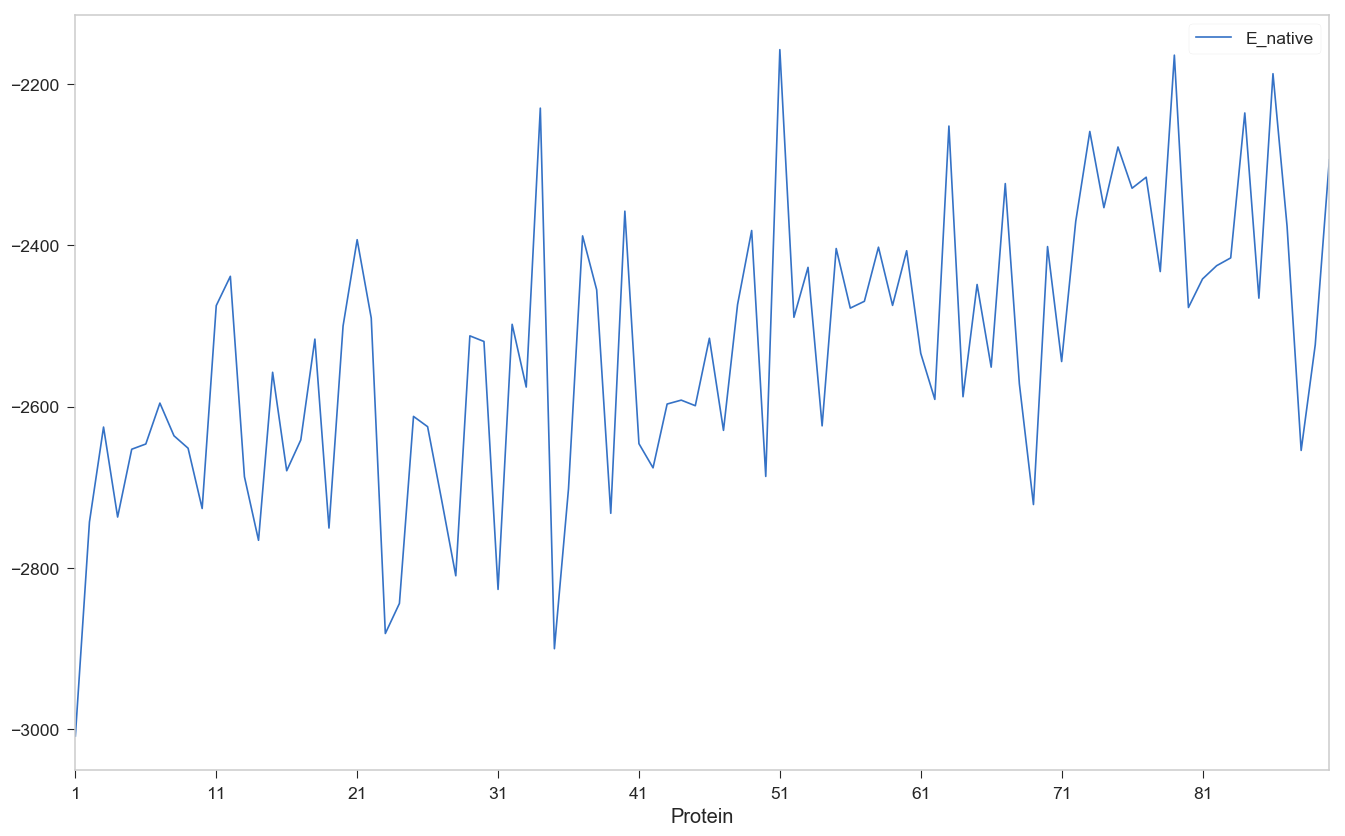

In [117]:
data.plot("Protein", "E_native")

In [120]:
os.chdir("/Users/weilu/Research/server/sep_2019/peptide_optimization/optimization/")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/cutoff100"
gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/original_gamma"

data = validate_hamiltonian_wei("phi_list.txt", "protein_list_tiny", gamma_file_name, "shuffle", 1000, mode=0)
data


210
420
60
0 0.28501951024346306
210
420
60
210
420
60
210
420
60
210
420
60


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1,0.285020,-563.839068,-561.332622,8.793945
1,2,0.107713,-567.748351,-566.811899,8.693935
2,3,-0.027309,-558.486254,-558.725908,8.775800
3,4,0.157535,-565.228535,-563.794115,9.105390
4,5,0.081485,-561.292942,-560.599687,8.507752


In [121]:
data

,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1,0.285020,-563.839068,-561.332622,8.793945
1,2,0.107713,-567.748351,-566.811899,8.693935
2,3,-0.027309,-558.486254,-558.725908,8.775800
3,4,0.157535,-565.228535,-563.794115,9.105390
4,5,0.081485,-561.292942,-560.599687,8.507752


In [123]:
gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/original_gamma"
original_gamma = np.loadtxt(gamma_file_name)

In [124]:
np.dot(A_prime, original_gamma)

-562.2346343586077

In [126]:
# we want to impose additional contraint so that A' * gamma = constnat.(-562.23)
c = -562.23
B_inv = filtered_B_inv
lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime) )
gamma_new = B_inv.dot(A-A_prime*lambda_2)

In [127]:
np.dot(A_prime, gamma_new)

-562.2299999999993

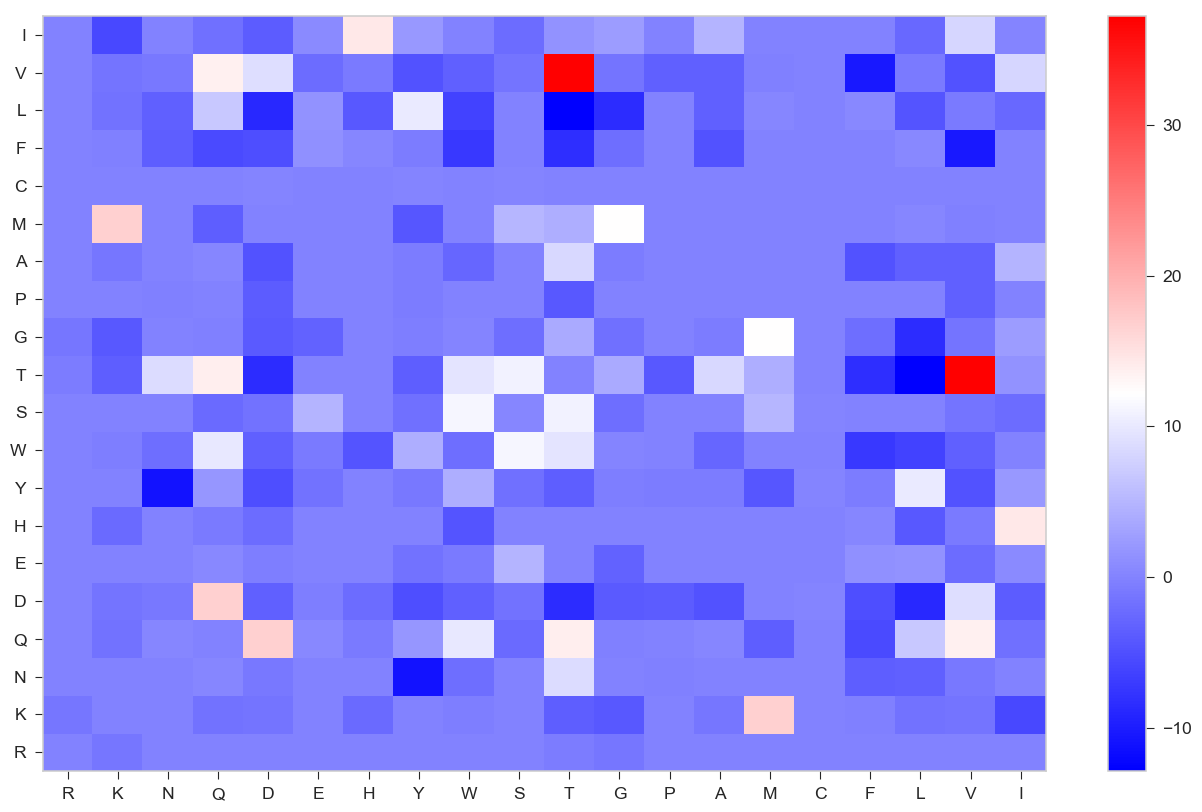

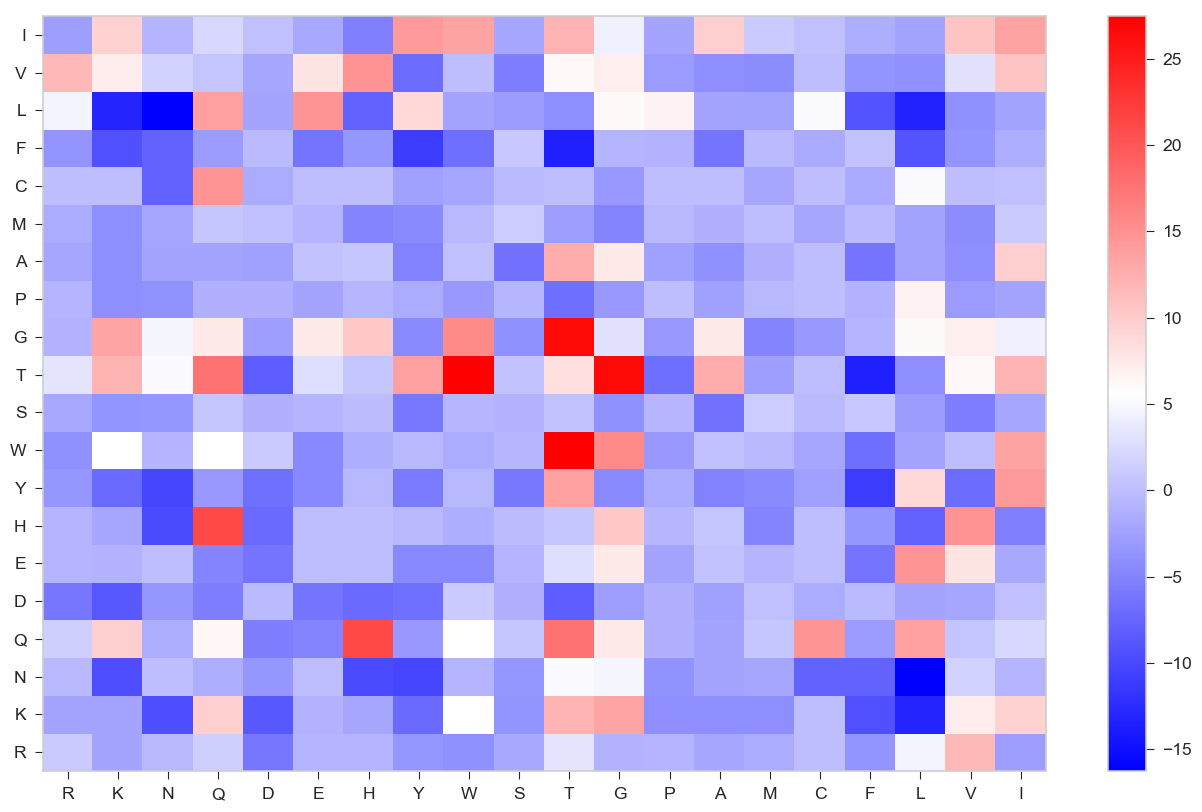

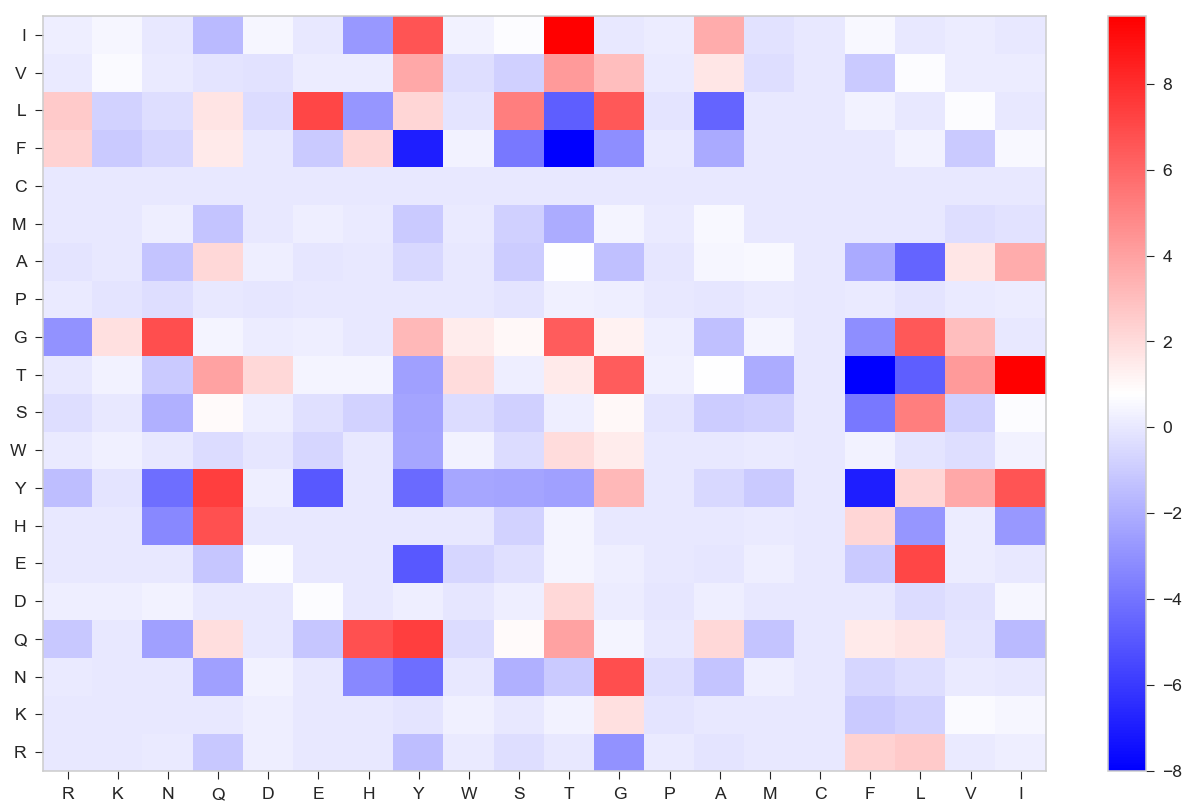

In [128]:
plot_contact_well(filtered_gamma[:210], inferBound=True)
plot_contact_well(filtered_gamma[210:420], inferBound=True)
plot_contact_well(filtered_gamma[420:], inferBound=True)

In [129]:
# impose A'gamma
save_gamma_pre = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/"
np.savetxt(f"{save_gamma_pre}/cutoff100_impose_Aprime_constraint", gamma_new)

In [130]:
os.chdir("/Users/weilu/Research/server/sep_2019/peptide_optimization/optimization/")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/cutoff100"
gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/cutoff100_impose_Aprime_constraint"

data = validate_hamiltonian_wei("phi_list.txt", "protein_list_tiny", gamma_file_name, "shuffle", 1000, mode=0)
data


210
420
60
0 5.650668065384711
210
420
60
210
420
60
210
420
60
210
420
60


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1,5.650668,-2978.012973,-1235.843095,308.312196
1,2,5.615262,-2711.807657,-1040.237232,297.683400
2,3,5.751143,-2594.283031,-873.201081,299.259126
3,4,5.757088,-2705.576760,-995.833711,296.980539
4,5,5.541697,-2622.239457,-1031.635421,287.024707


In [131]:
data

,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1,5.650668,-2978.012973,-1235.843095,308.312196
1,2,5.615262,-2711.807657,-1040.237232,297.683400
2,3,5.751143,-2594.283031,-873.201081,299.259126
3,4,5.757088,-2705.576760,-995.833711,296.980539
4,5,5.541697,-2622.239457,-1031.635421,287.024707


In [133]:
# mix gammas so that we don't overfitting too much.
alpha = 0.95
mixed_gamma = alpha*original_gamma + (1-alpha)*gamma_new
save_gamma_pre = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/"
np.savetxt(f"{save_gamma_pre}/mixed_original_and_cutoff100_impose_Aprime_constraint", mixed_gamma)

In [134]:
os.chdir("/Users/weilu/Research/server/sep_2019/peptide_optimization/optimization/")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/cutoff100"
gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/mixed_original_and_cutoff100_impose_Aprime_constraint"

data = validate_hamiltonian_wei("phi_list.txt", "protein_list_tiny", gamma_file_name, "shuffle", 1000, mode=0)
data


210
420
60
0 5.049209188880802
210
420
60
210
420
60
210
420
60
210
420
60


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1,5.049209,-684.547763,-595.058146,17.723492
1,2,5.009914,-674.951316,-590.483165,16.860201
2,3,5.052534,-660.276093,-574.449667,16.986807
3,4,5.001211,-672.245947,-585.396095,17.365764
4,5,4.809522,-664.340268,-584.151473,16.672924


In [135]:
data

,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1,5.049209,-684.547763,-595.058146,17.723492
1,2,5.009914,-674.951316,-590.483165,16.860201
2,3,5.052534,-660.276093,-574.449667,16.986807
3,4,5.001211,-672.245947,-585.396095,17.365764
4,5,4.809522,-664.340268,-584.151473,16.672924


In [110]:
# with additional constraint
data

,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1,5.651049,-3008.457623,-1266.073497,308.329333
1,2,5.615784,-2742.978825,-1071.181503,297.696134
2,3,5.751925,-2625.236556,-903.822166,299.276227
3,4,5.757630,-2736.832105,-1026.833311,296.997018
4,5,5.541917,-2652.731026,-1061.958377,287.043734
5,6,5.640894,-2646.236207,-977.280624,295.867223
6,7,5.643035,-2595.491454,-877.928416,304.368652
7,8,5.632280,-2636.063746,-922.999355,304.151143
8,9,5.713291,-2651.458445,-931.172575,301.102450
9,10,5.940028,-2726.245430,-934.732806,301.600012


In [ ]:
# contraints T_f = T_c
B_inverse = np.linalg.pinv(B)
up = A.dot(B_inverse).dot(A) - A_prime.dot(B_inverse).dot(A)
down = A.dot(B_inverse).dot(A_prime) - A_prime.dot(B_inverse).dot(A_prime)
lambda_1 = up / down
print(lambda_1)
g = B_inverse.dot(A - A_prime*lambda_1)

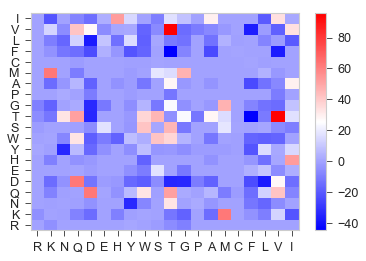

In [102]:
# lamb, P = np.linalg.eig(B)
# lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)
# filtered_lamb = np.copy(lamb)
# cutoff_mode = 200
# filtered_B_inv, filtered_lamb, P = get_filtered_B_inv_lambda_and_P(filtered_lamb, 
#                                                                    cutoff_mode, P)
# filtered_gamma = np.dot(filtered_B_inv, A)
# filtered_B = np.linalg.inv(filtered_B_inv)
# plot_contact_well(filtered_gamma[:210], inferBound=True)

In [ ]:
# "mkdir -p database/dompdb"
# "mkdir -p database/S20_seq"
# "mkdir optimization"
# cp ~/opt/optimization/phi_list_contact.txt phi_list.txt

In [9]:
def mycp(source, target):
    os.system(f"cp {source} {target}")
    
do = os.system

def getSeq(fileLocation):
    p = PDBParser()
    s = p.get_structure("test", fileLocation)
    seq = ""
    residues = list(s.get_residues())
    for residue in residues:
        res_id = residue.get_id()[0]
        if res_id==' ':
            residue_name = residue.get_resname()
            seq += three_to_one(residue_name)
    return seq

# get chains nad seq
def getChainsAndSeq(fileLocation):
    # fileLocation = "/Users/weilu/Research/examples/optimization/optimization/Structure_Ensemble/1.pdb"
    p = PDBParser()
    pdb = p.get_structure("test", fileLocation)
    residues = list(pdb.get_residues())
    seq = ""
    chains = ""
    for residue in residues:
        res_id = residue.get_id()[0]
        chain = residue.get_full_id()[2]
        if res_id==' ':
            residue_name = residue.get_resname()
            seq += three_to_one(residue_name)
            chains += chain
    return chains, seq

In [40]:
pdbFolderList = glob.glob("/Users/weilu/Downloads/Optimization_Xfunnel/Structure_Ensemble_*")

In [34]:
pdbFolderList = [ '/Users/weilu/Downloads/Optimization_Xfunnel/Structure_Ensemble_2BNQ',
 '/Users/weilu/Downloads/Optimization_Xfunnel/Structure_Ensemble_4FTV']

In [4]:
pdbFolder = pdbFolderList[0]

In [5]:
pdbName = pdbFolder.split("_")[-1]

In [6]:
pdbName

'1BD2'

In [41]:
len(pdbFolderList)

33

In [43]:

# pre = "/Users/weilu/Research/server/sep_2019/peptide_optimization_specific_test"
pre = "/Users/weilu/Research/server/sep_2019/peptide_optimization_trial_4_duplicate"

do(f"mkdir -p {pre}/database/dompdb")
do(f"mkdir -p {pre}/database/S20_seq")

for pdbFolder in pdbFolderList:
    pdbName = pdbFolder.split("_")[-1]
    source = pdbFolder + f"/*ab.pdb"
    p_list = glob.glob(source)
    for p in p_list:
        target = f"{pre}/database/dompdb/{pdbName}.pdb"
        ## move native pdbs to dompdb
        mycp(p, target)
        ## move native seq to S20_seq
        seq = getSeq(target)
        fileLocation = f"{pre}/database/S20_seq/{pdbName}.seq"
        with open(fileLocation, "w") as out:
            out.write(seq+"\n")
       


In [44]:
do(f"mkdir -p {pre}/optimization")
## write protein_list
fileLocation = f"{pre}/optimization/protein_list"
with open(fileLocation, "w") as out:
    for pdbFolder in pdbFolderList:
        pdbName = pdbFolder.split("_")[-1]
        out.write(f"{pdbName}\n")

In [45]:
do(f"mkdir -p {pre}/optimization/decoys/shuffle")
# generate decoys
for pdbFolder in pdbFolderList:
    pdbName = pdbFolder.split("_")[-1]
    source = pdbFolder + f"/*ab.pdb"
    p_list = glob.glob(source)
    # print(p_list, source)
    assert len(p_list) == 1
    chain_seq, seq = getChainsAndSeq(p_list[0])
    print(pdbName, i, len(seq), len(chain_seq))
    decoy_list = []
    with open(f"{pdbFolder}/peptide.txt") as f:
        for line in f:
            pep = line.strip()
            assert len(pep) == 9
            for c in list(set(chain_seq)):
                if chain_seq.count(c) == 9:
                    first_c = chain_seq.find(c)
                    a = list(seq)
                    a[first_c:first_c+9] = pep
                    decoy = "".join(a)
                    decoy_list.append(decoy)
    fileLocation = f"{pre}/optimization/decoys/shuffle/{pdbName}.decoys"
    with open(fileLocation, "w") as out:
        for decoy in decoy_list:
            out.write(decoy+"\n")

1BD2 1 416 416
2JCC 1 421 421
1AO7 1 418 418
1LP9 1 421 421
3QDJ 1 424 424
3GSN 1 425 425
1QRN 1 418 418
3PWP 1 420 420
5W1W 1 395 395
1QSE 1 418 418
4EUP 1 425 425
5TEZ 1 422 422
3D39 1 419 419
6EQA 1 426 426
2BNR 1 425 425
5NME 1 426 426
5MEN 1 425 425
2VLJ 1 421 421
2VLK 1 421 421
2J8U 1 421 421
2GJ6 1 418 418
1OGA 1 421 421
2F54 1 427 427
5D2L 1 420 420
2F53 1 431 431
3QEQ 1 426 426
1QSF 1 418 418
2UWE 1 421 421
5EUO 1 424 424
3H9S 1 420 420
3D3V 1 419 419
2BNQ 1 425 425
4FTV 1 420 420


In [46]:
do(f"mkdir -p {pre}/phis")
do(f"cp ~/opt/optimization/phi_list_contact.txt {pre}/optimization/phi_list.txt")

0

In [29]:
do(f"mkdir -p {pre}/optimization/decoys/shuffle")
# generate decoys
for pdbFolder in pdbFolderList:
    pdbName = pdbFolder.split("_")[-1]
    source = pdbFolder + f"/*ab.pdb"
    p_list = glob.glob(source)
    if pdbName != "3D39":
        continue
    # print(p_list, source)
    assert len(p_list) == 1
    chain_seq, seq = getChainsAndSeq(p_list[0])
    print(pdbName, i, len(seq), len(chain_seq))
    decoy_list = []
    decoy = ""
    with open(f"{pdbFolder}/peptide.txt") as f:
        for line in f:
            pep = line.strip()
            assert len(pep) == 9
            for c in list(set(chain_seq)):
                if chain_seq.count(c) == 9:
                    first_c = chain_seq.find(c)
                    a = list(seq)
                    a[first_c:first_c+9] = pep
                    decoy = "".join(a)
                    decoy_list.append(decoy)
    fileLocation = f"{pre}/optimization/decoys/shuffle/{pdbName}.decoys"
    with open(fileLocation, "w") as out:
        for decoy in decoy_list:
            out.write(decoy+"\n")

3D39 1 419 419


In [31]:
list(set(chain_seq))

['A', 'X', 'B', 'Y']

In [32]:
chain_seq.count("Y")

8

In [205]:
## write protein_list
fileLocation = f"{pre}/optimization/protein_list"
with open(fileLocation, "w") as out:
    for pdbFolder in pdbFolderList:
        pdbName = pdbFolder.split("_")[-1]
        for i in range(1, 6):
            out.write(f"{pdbName}_{i}\n")
# generate decoys
for pdbFolder in pdbFolderList:
    pdbName = pdbFolder.split("_")[-1]
    for i in range(1, 6):
        source = pdbFolder + f"/{i}.pdb"
        source = pdbFolder + f"/*ab.pdb"
        p_list = glob.glob(source)
        assert len(p_list) == 1
        chain_seq, seq = getChainsAndSeq(source)
        print(pdbName, i, len(seq), len(chain_seq))
        decoy_list = []
        with open(f"{pdbFolder}/peptide.txt") as f:
            for line in f:
                pep = line.strip()
                assert len(pep) == 9
                for c in list(set(chain_seq)):
                    if chain_seq.count(c) == 9:
                        first_c = chain_seq.find(c)
                        a = list(seq)
                        a[first_c:first_c+9] = pep
                        decoy = "".join(a)
                        decoy_list.append(decoy)
        fileLocation = f"{pre}/optimization/decoys/shuffle/{pdbName}_{i}.decoys"
        with open(fileLocation, "w") as out:
            for decoy in decoy_list:
                out.write(decoy+"\n")

In [168]:
# ensure they all 9 residue peptide.
for pdbFolder in pdbFolderList:
    pdbName = pdbFolder.split("_")[-1]
    # print(pdbName)
    with open(f"{pdbFolder}/peptide.txt") as f:
        for line in f:
            pep = line.strip()
            assert len(pep) == 9

In [160]:
fileLocation

'/Users/weilu/Research/server/sep_2019/peptide_optimization_trial_2/database/S20_seq/4FTV_5.seq'

In [164]:
for c in "ABCDEFG":
    if chain_seq.count(c) == 9:
        first_c = chain_seq.find(c)
        a = list(seq)
        a[first_c:first_c+9] = pep
        decoy = "".join(a)
        decoy_list.append(decoy)

107

In [3]:
# get seq
fileLocation = "/Users/weilu/Research/examples/optimization/optimization/Structure_Ensemble/1.pdb"
p = PDBParser()
pdb = p.get_structure("test", fileLocation)
residues = list(pdb.get_residues())
seq = ""
chains = ""
for residue in residues:
    res_id = residue.get_id()[0]
    chain = residue.get_full_id()[2]
    if res_id==' ':
        residue_name = residue.get_resname()
        seq += three_to_one(residue_name)
        chains += chain

In [5]:
# get decoy
decoy_list = []
with open("/Users/weilu/Research/examples/optimization/optimization/Structure_Ensemble/peptide.txt") as f:
    for line in f:
        pep = line.strip()
        assert len(pep) == 9
        a = list(seq)
        a[180:189] = pep
        decoy = "".join(a)
        decoy_list.append(decoy)

In [38]:
for i in range(1, 91):
    pre = "/Users/weilu/Research/server/sep_2019/peptide_optimization"
    fileLocation = f"{pre}/database/S20_seq/{i}.seq"
    with open(fileLocation, "w") as out:
        out.write(seq+"\n")

In [40]:
for i in range(1, 91):
    fileLocation = f"{pre}/optimization/decoys/shuffle/{i}.decoys"
    with open(fileLocation, "w") as out:
        for decoy in decoy_list:
            out.write(decoy+"\n")

In [42]:
with open("/Users/weilu/Research/server/sep_2019/peptide_optimization/optimization/protein_list", "w") as out:
    for i in range(1, 91):
        out.write(f"{i}\n")

In [41]:
for i in range(1, 91):
    os.system(f"cp /Users/weilu/Research/examples/optimization/optimization/Structure_Ensemble/{i}.pdb /Users/weilu/Research/server/sep_2019/peptide_optimization/database/dompdb/")

In [39]:
len(decoy_list)

1000

In [6]:
seq[180:189]

'SLLMWITQV'

In [49]:
a = list(seq)
a[180:189] = list('FIFLLFLTL')

In [26]:
all_seq = []
for i in range(1, 91):
    fileLocation = f"/Users/weilu/Research/examples/optimization/optimization/Structure_Ensemble/{i}.pdb"
    seq = getSeq(fileLocation)
    assert len(seq) == 414
    all_seq.append(seq)
#     assert preSeq == seq
#     preSeq = seq

In [27]:
all_seq[0]

'GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDGETRKVKAHSQTHRVDLGTLRGYYNQSEAGSHTVQRMYGCDVGSDWRFLRGYHQYAYDGKDYIALKEDLRSWTAADMAAQTTKHKWEAAHVAEQLRAYLEGTCVEWLRRYLENGKETLQSLLMWITQVQEVTQIPAALSVPEGENLVLNCSFTDSAIYNLQWFRQDPGKGLTSLLLIQSSQREQTSGRLNASLDKSSGRSTLYIAASQPGDSATYLCAVRPTSGGSYIPTFGRGTSLIVHPGVTQTPKFQVLKTGQSMTLQCAQDMNHEYMSWYRQDPGMGLRLIHYSVGAGITDQGEVPNGYNVSRSTTEDFPLRLLSAAPSQTSVYFCASSYVGNTGELFFGEGSRLTVLE'

In [28]:
all_seq[0] == all_seq[1]

True

In [29]:
for i in range(90):
    if all_seq[i] != all_seq[0]:
        print(i)

In [9]:
def getAllFrames(movieLocation):
    # movieLocation = "/Users/weilu/Research/examples/openMM_simulation/test_2/movie.pdb"
    location = movieLocation
    with open(location) as f:
        a = f.readlines()
    n = len(a)
    # get the position of every model title
    model_title_index_list = []
    for i in range(n):
        if len(a[i]) >= 5 and a[i][:5] == "MODEL":
            model_title_index = i
            model_title_index_list.append(model_title_index)
    model_title_index_list.append(n)
    check_array = np.diff(model_title_index_list)
    if np.allclose(check_array, check_array[0]):
        size = check_array[0]
    elif np.allclose(check_array[:-1], check_array[0]) and check_array[-1] == check_array[0] + 1:
        # this is ok. with extra "END"
        size = check_array[0]
    else:  
        print("!!!! Someting is wrong  !!!!")
        print(check_array)
    return a

In [10]:
num_of_frames = int(n/size)

In [11]:
frame = 5
oneFrame = a[size*frame:size*(frame+1)]

In [60]:
frame = num_of_frames
oneFrame = a[size*frame:size*(frame+1)]

In [61]:
oneFrame

[]

In [45]:


# s = p.get_structure("test", f)
# residues = list(s.get_residues())

In [24]:
import io

f = io.StringIO("".join(oneFrame))
MAX_OFFSET=4
DISTANCE_CUTOFF=9.5
s = p.get_structure("test", f)
chains = s[0].get_list()

# import pdb file
native_coords = []
for chain in chains:
    dis = []
    all_res = []
    for res in chain:
        is_regular_res = res.has_id('CA') and res.has_id('O')
        res_id = res.get_id()[0]
        if (res.get_resname()=='GLY'):
            native_coords.append(res['CA'].get_coord())
        elif (res_id==' ' or res_id=='H_MSE' or res_id=='H_M3L' or res_id=='H_CAS') and is_regular_res:
            native_coords.append(res['CB'].get_coord())
        else:
            print('ERROR: irregular residue at %s!' % res)
            exit()
native_contacts_table = compute_native_contacts(native_coords, MAX_OFFSET, DISTANCE_CUTOFF)


In [25]:
native_contacts_table

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

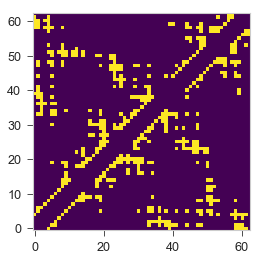

In [62]:
plt.imshow(native_contacts_table, origin=[0,0])